<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-8/blob/main/d_db_scan_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.7 MB/s e

In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [6]:
dataset_file_path = '/content/drive/MyDrive/dm-assignment-6/Mall_Customers.csv'

In [7]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

In [8]:
data = pd.read_csv(dataset_file_path)

rows = data.shape[0]
cols = data.shape[1]

In [9]:
print("See below for the number of missing values in each column: ")
data.isnull().sum()

See below for the number of missing values in each column: 


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**data analysis**

In [10]:
min_male_age = data[data['Gender'] == 'Male']['Age'].min()
max_male_age = data[data['Gender'] == 'Male']['Age'].max()

min_female_age = data[data['Gender'] == 'Female']['Age'].min()
max_female_age = data[data['Gender'] == 'Female']['Age'].max()

print(f"Male ages: min={min_male_age} max={max_male_age}")
print(f"Female ages: min={min_female_age} max={max_female_age}")

Male ages: min=18 max=70
Female ages: min=18 max=68


In [12]:
males_age = data[data['Gender']=='Male']['Age'] # subset with males age
females_age = data[data['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,70,5)

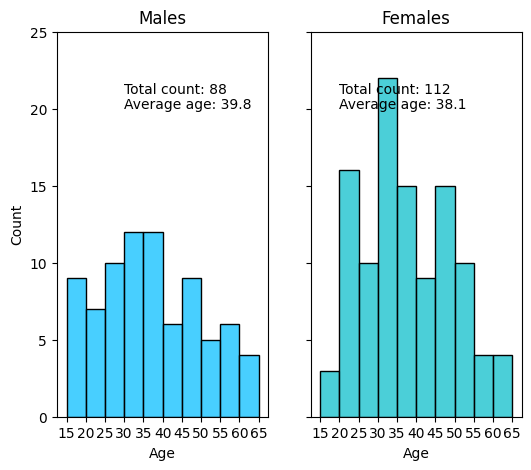

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5), sharey=True)

# Histogram for males using histplot
sns.histplot(males_age, bins=age_bins, kde=False, color='#0BC0FF', ax=ax1, edgecolor="k", linewidth=1)
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(30, 21, "Total count: {}".format(males_age.count()))
ax1.text(30, 20, "Average age: {:.1f}".format(males_age.mean()))

# Histogram for females using histplot
sns.histplot(females_age, bins=age_bins, kde=False, color='#0FC0CB', ax=ax2, edgecolor="k", linewidth=1)
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(20, 21, "Total count: {}".format(females_age.count()))
ax2.text(20, 20, "Average age: {:.1f}".format(females_age.mean()))

plt.show()

In [33]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})  # Converting Gender to numerical

In [34]:
# Importing pyCaret
from pycaret.clustering import *

# Setting up the pyCaret environment
clustering_setup = setup(data=data)

# Creating a model - DBSCAN
dbscan_model = create_model('dbscan')

# Assigning the clusters
dbscan_results = assign_model(dbscan_model)

,Description,Value
0,Session id,3721
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [35]:
# Displaying the results
print(dbscan_results.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

      Cluster  
0  Cluster -1  
1  Cluster -1  
2  Cluster -1  
3  Cluster -1  
4  Cluster -1  


In [42]:
from pycaret.clustering import plot_model


plot_model(dbscan_model, plot='distribution')

